In [1]:
# Dataset detail:-
    
# Independent variables:

# age : age of the client 
# job : type of the job 
# marital : marital status
# education : level of education 
# default : loan defaulter or not
# balance : bank balance in dollers
# housing : client have the house loan or not
# loan : client have the personal loan or not 
# contact : type of the contact of the client  
# day : last contact day of the client 
# month : last contact month of the client 
# duration : call duartion with the client(in sec's)
# campaign : no of times contacted with client in the entire campaign 
# pdays : no of days before client contacted 
# previous : no of times contacted with client in the before the campaign
# poutcome : outcome of the previous marketing campaign

# ------------------------------------------------------------------------------------------------------
# Dependent variable:

# Target : product subscribed or not

In [79]:
#data manupulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model building libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# metrics for model evalution
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [3]:
banking_data = pd.read_csv('Banking_finance.csv') #read the data frame

In [4]:
banking_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df = banking_data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- No null values noted.

## Checking the Unique values of all the Columns

In [7]:
for col in df.columns:
    print(f"{col} Unique Count: {df[col].nunique()}")
    print("==="*30)
    print(df[col].unique())
    print("==="*30)

age Unique Count: 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job Unique Count: 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital Unique Count: 3
['married' 'single' 'divorced']
education Unique Count: 4
['tertiary' 'secondary' 'unknown' 'primary']
default Unique Count: 2
['no' 'yes']
balance Unique Count: 7168
[ 2143    29     2 ...  8205 14204 16353]
housing Unique Count: 2
['yes' 'no']
loan Unique Count: 2
['no' 'yes']
contact Unique Count: 3
['unknown' 'cellular' 'telephone']
day Unique Count: 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month Unique Count: 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 's

- Job, education, contact having Unknown. Will replace with NaN

In [8]:
df.replace('unknown',np.NaN,inplace= True) #replacing 'Unknown' with NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#checking null values
df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [11]:
#checking the percentage
(df.isna().sum()/df.shape[0])*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

- poutcome having large null value. We will be 
- Contact column is not important.
- We will drop both the columns
- We will fill the nan values of job and education field with mode.

In [12]:
df.drop(['contact', 'poutcome'], axis = 1, inplace= True)

In [13]:
#filling the mode in job
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [15]:
#creating Columns list for Number and category
num_col = [col for col in df.columns if df[col].dtype != np.object_]
cat_col = [col for col in df.columns if df[col].dtype == np.object_]

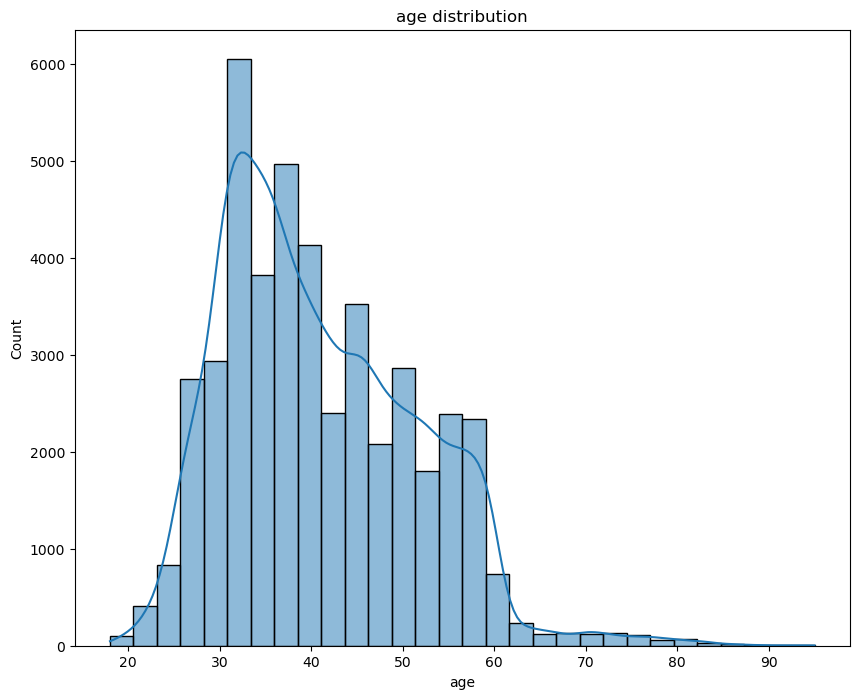

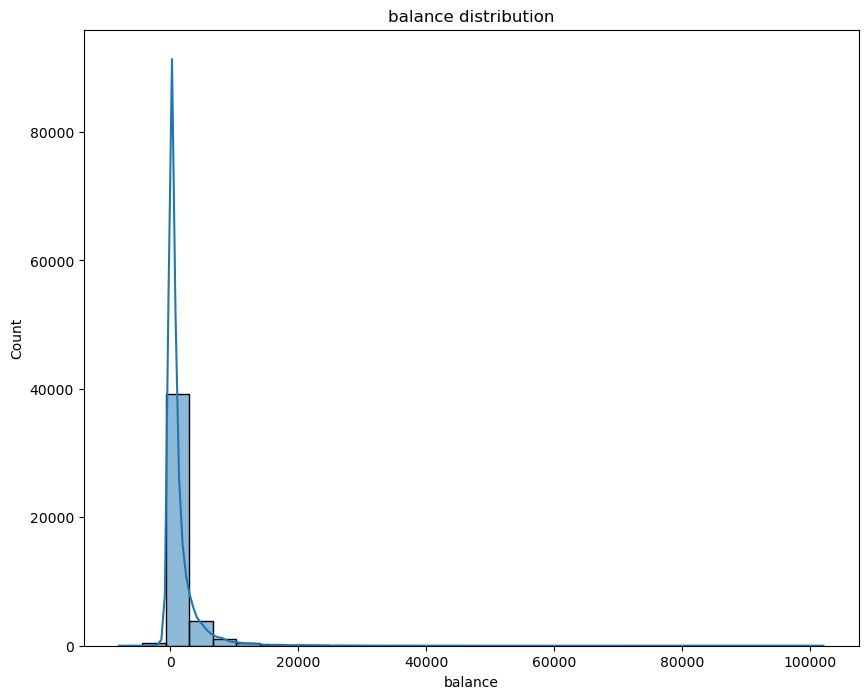

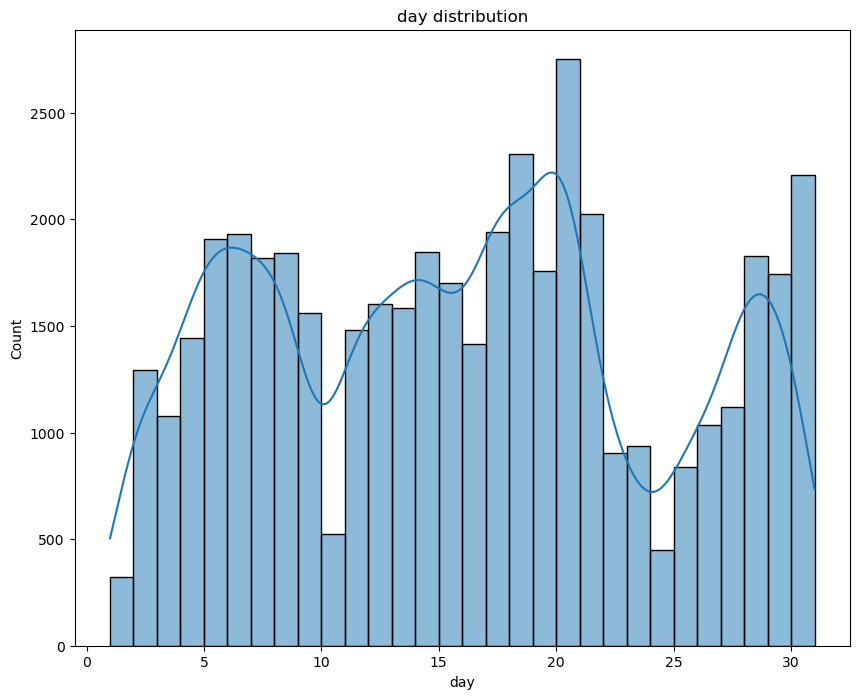

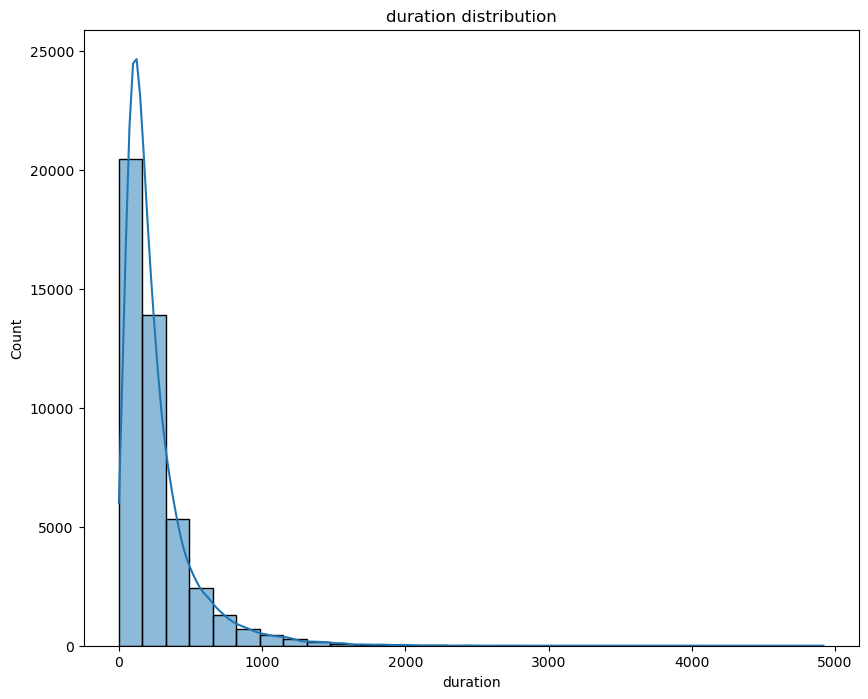

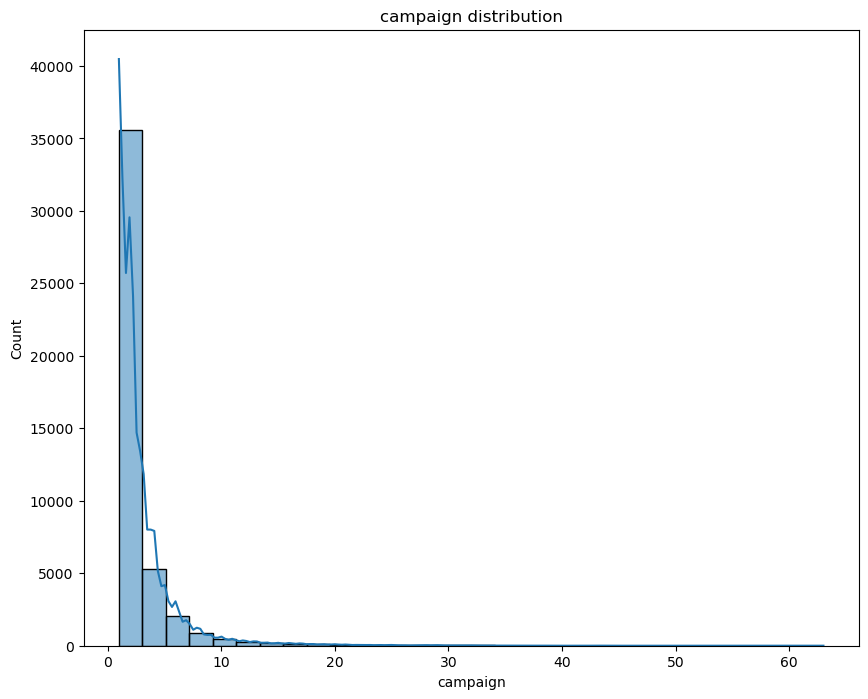

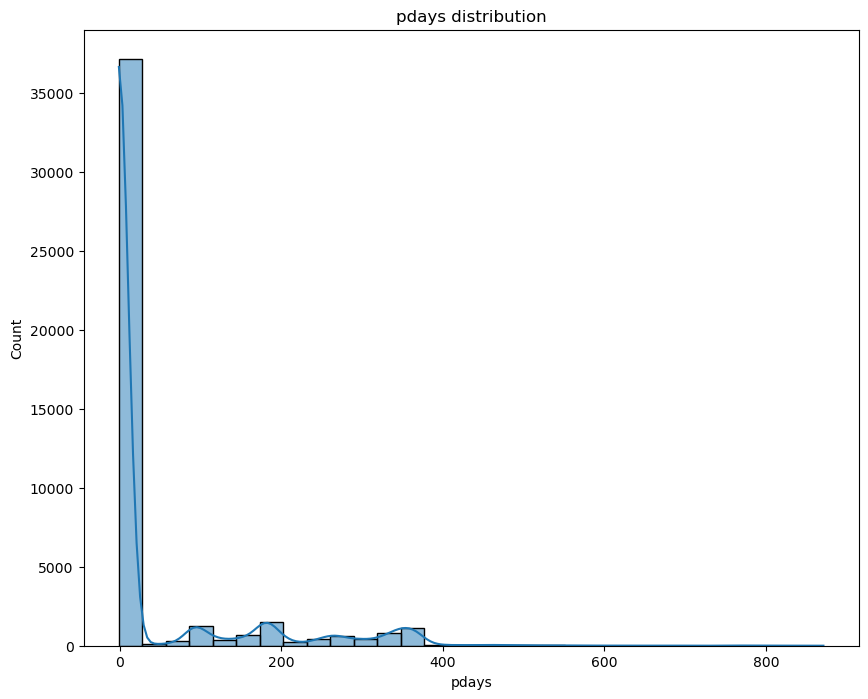

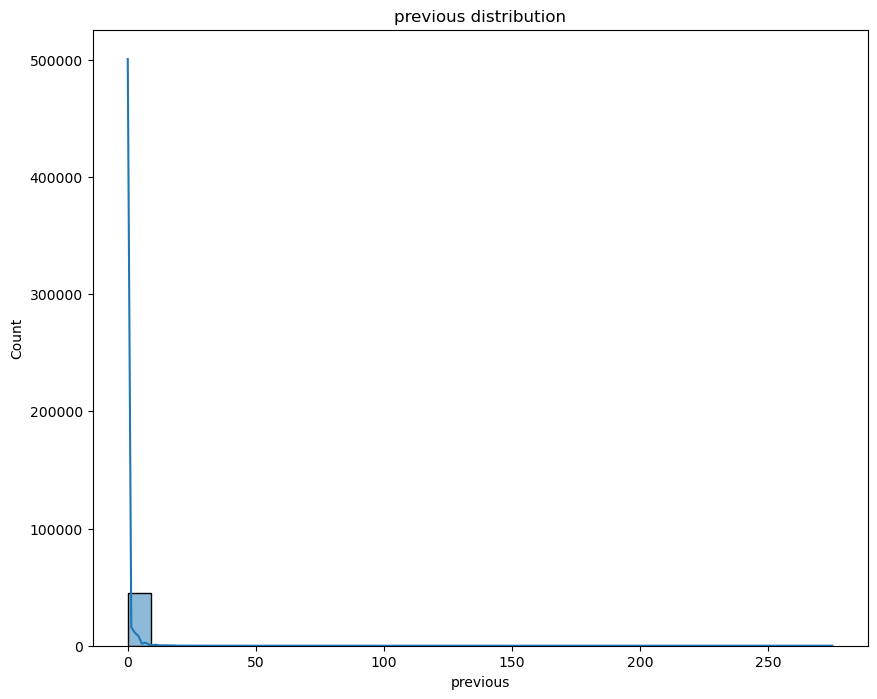

In [16]:
#analyzing num columns
for col in num_col:
    plt.figure(figsize=(10,8))
    sns.histplot(df[col],kde= True, bins = 30)
    plt.title(f"{col} distribution")
plt.show()

## Checking and treating the outliers

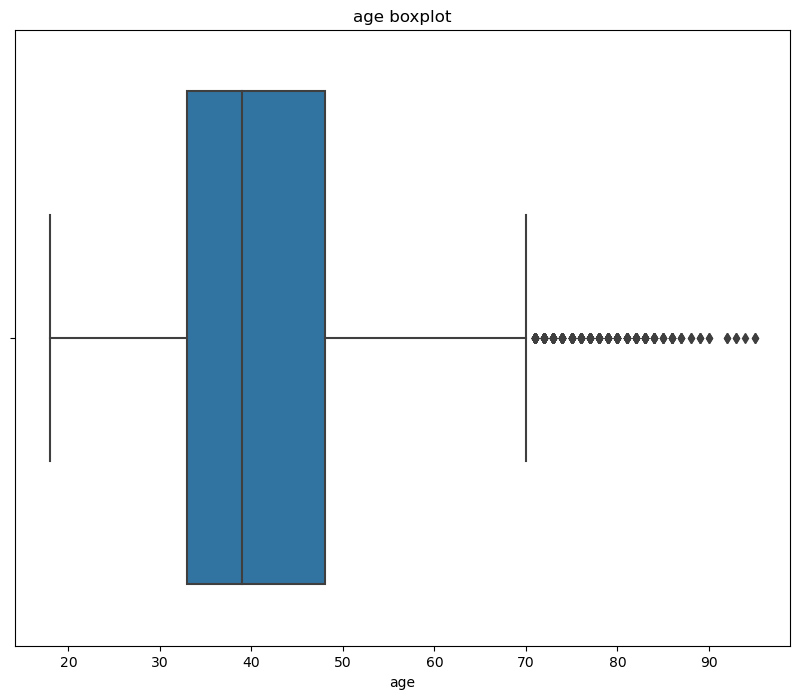

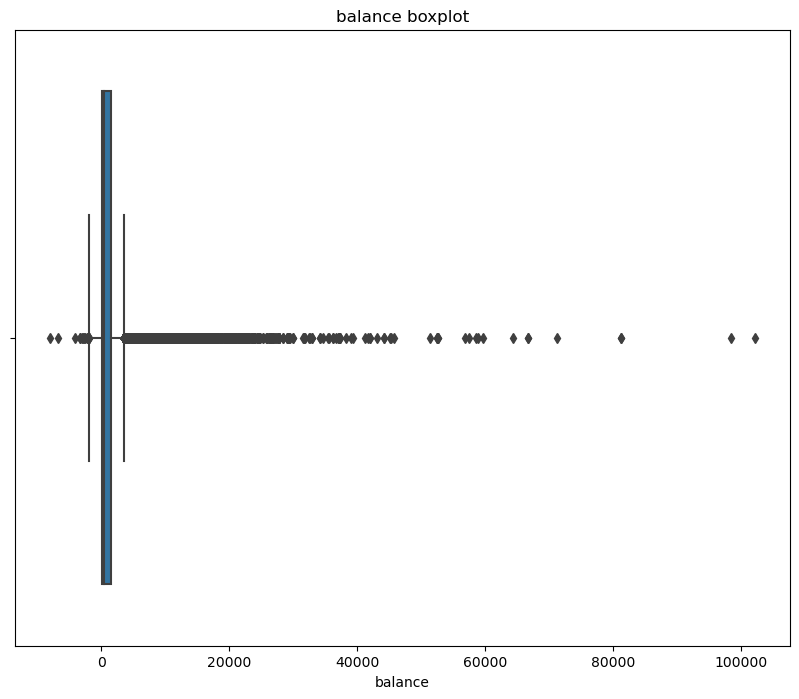

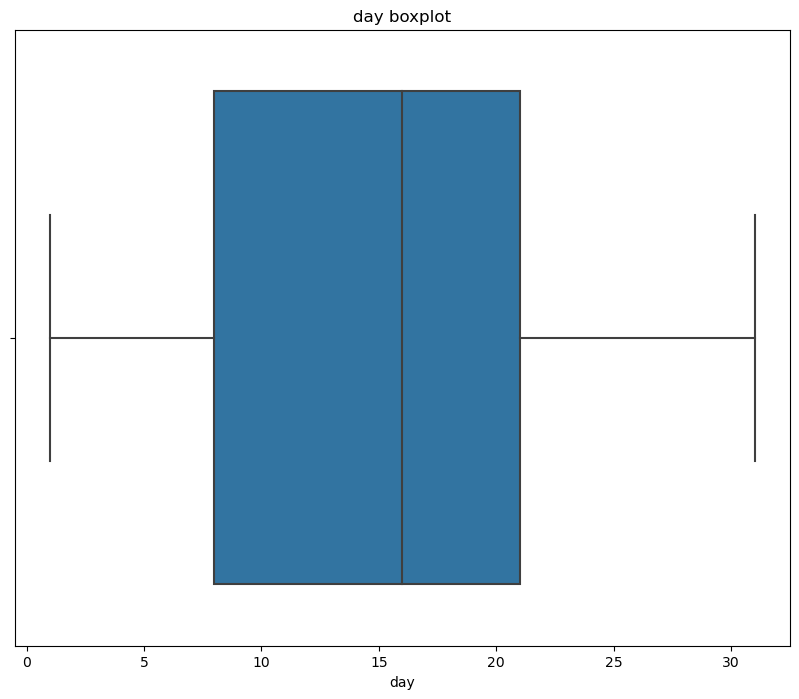

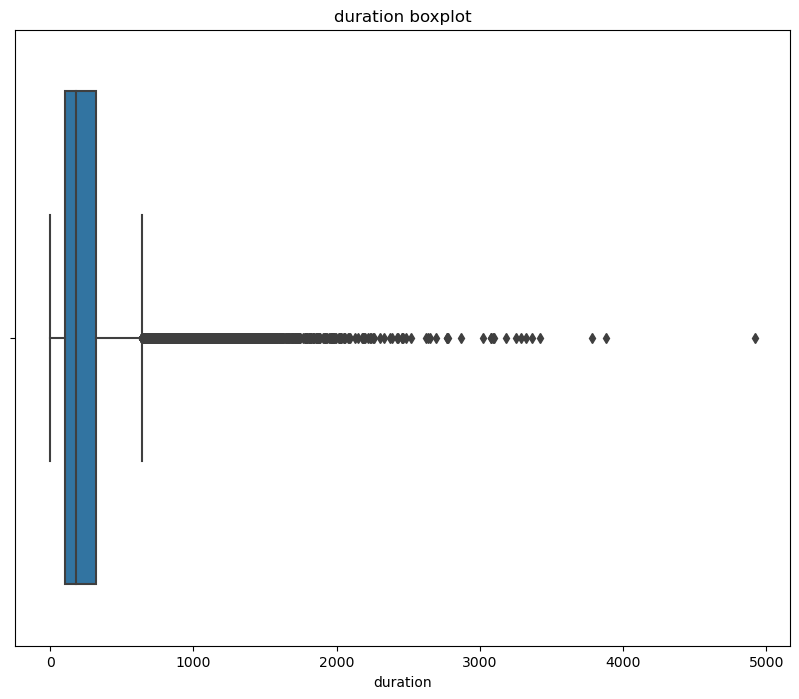

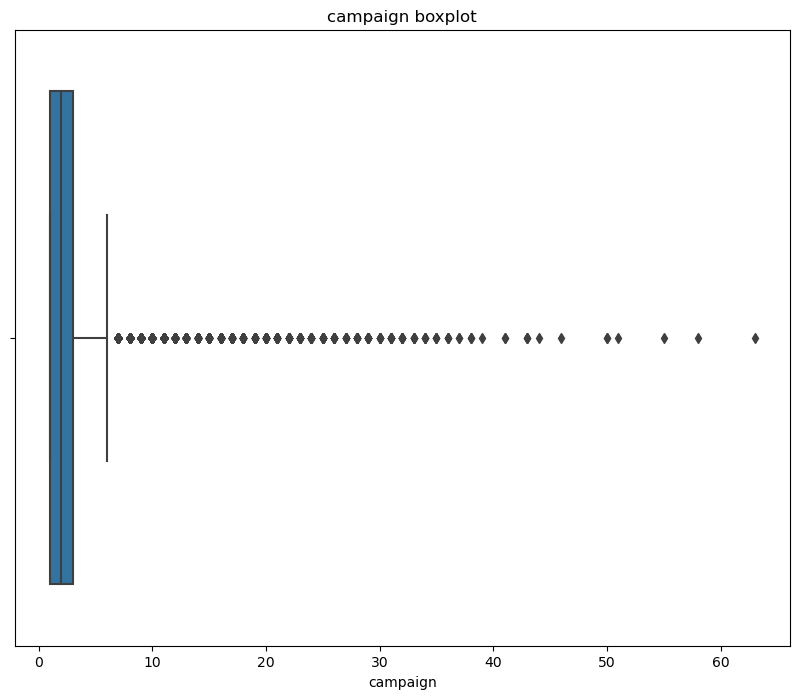

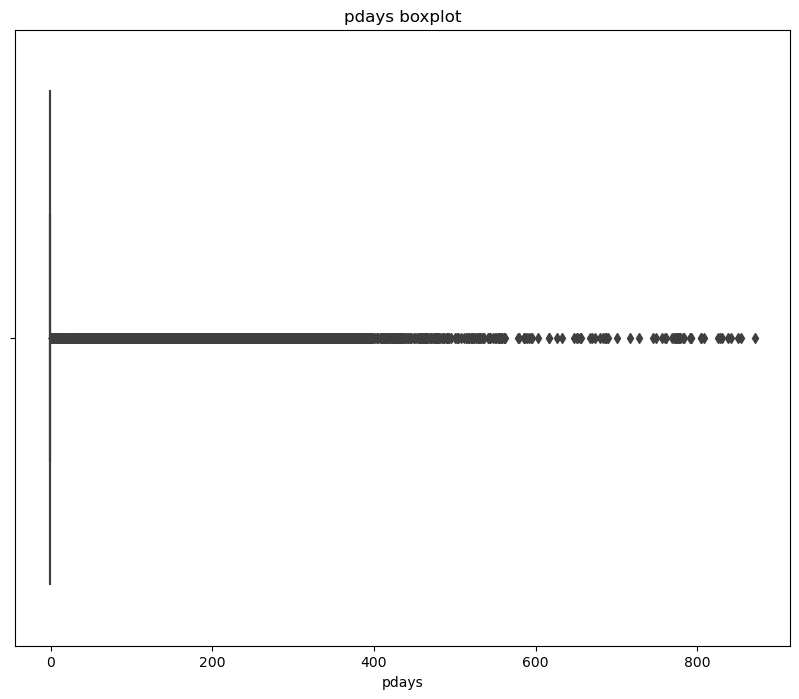

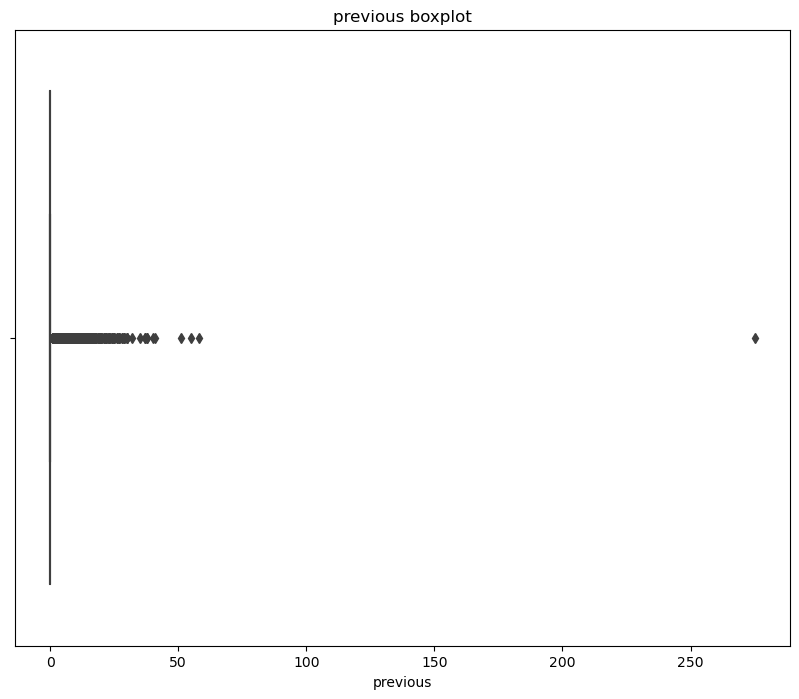

In [17]:
for col in num_col:
    plt.figure(figsize=(10,8))
    sns.boxplot(x = df[col])
    plt.title(f"{col} boxplot")
plt.show()

## Outlier treatment

In [18]:
def check_outliers(df, Range = 1.5):
    """
    FUnction will check the Outliers in the dataframe and return
    upper and lower limit
    """
    Q1 = df.quantile(.25,numeric_only = True)
    Q3 = df.quantile(.75, numeric_only = True)
    IQR = Q3 - Q1
    pos_outliers = Q3 + IQR*Range
    neg_outliers = Q1 - IQR*Range
    return pos_outliers, neg_outliers
pos_outliers, neg_outliers = check_outliers(df)

In [19]:
df3 = df[~((df <neg_outliers) | (df > pos_outliers)).any(axis = 1)] #creating new dataframe where there is no null value.

C:\Users\sayan\AppData\Local\Temp\ipykernel_11616\2190492568.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df[~((df <neg_outliers) | (df > pos_outliers)).any(axis = 1)] #creating new dataframe where there is no null value.


In [20]:
print(f"Number of rows deleted: {df.shape[0] - df3.shape[0]}")

Number of rows deleted: 17018


In [21]:
#capping the outlier except pdays and previous
for i in range(len(neg_outliers.index)):
   
    if ((neg_outliers.index[i] != 'pdays') and (neg_outliers[i] != 'previous')):
        print(neg_outliers.index[i])
        df[neg_outliers.index[i]] = np.where(df[neg_outliers.index[i]] <= neg_outliers[i], neg_outliers[i],
                                       np.where(df[pos_outliers.index[i]] >= pos_outliers[i], pos_outliers[i],
                                                df[pos_outliers.index[i]]))
    else:
        break

age
balance
day
duration
campaign


## Checking the distribution after outlier treatment

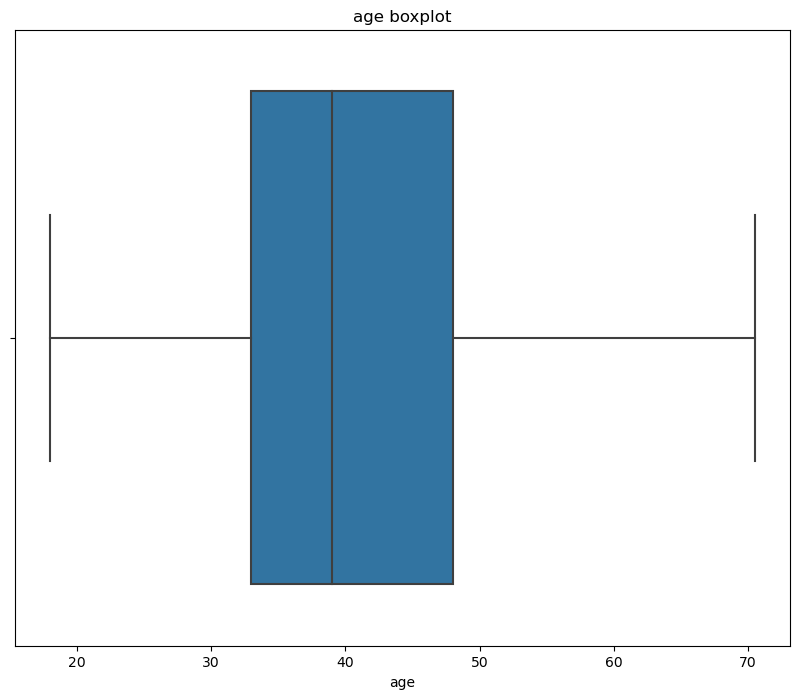

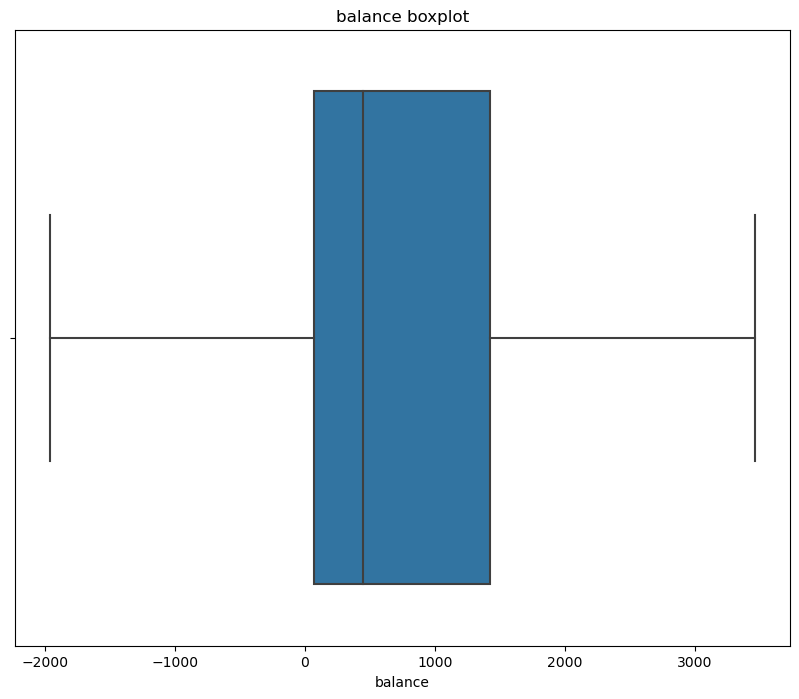

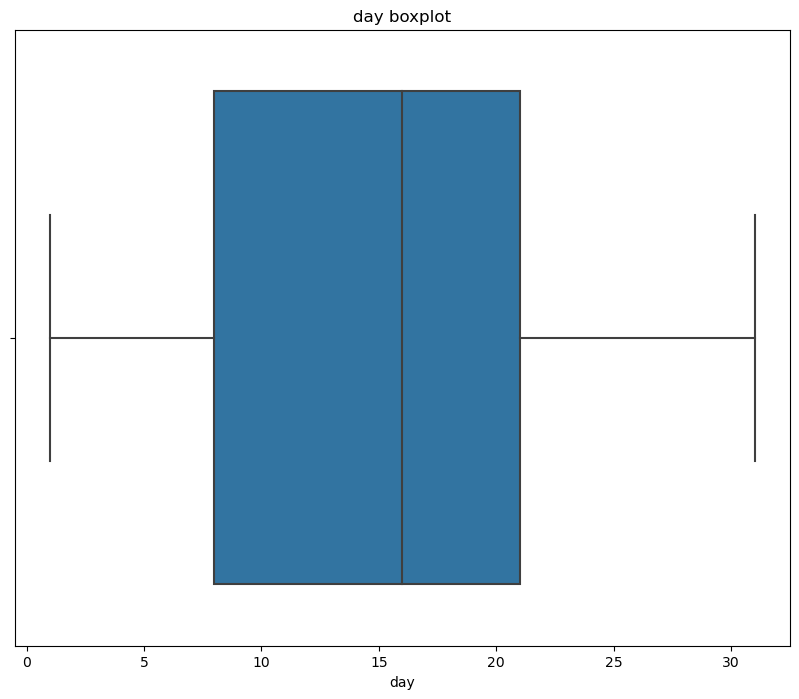

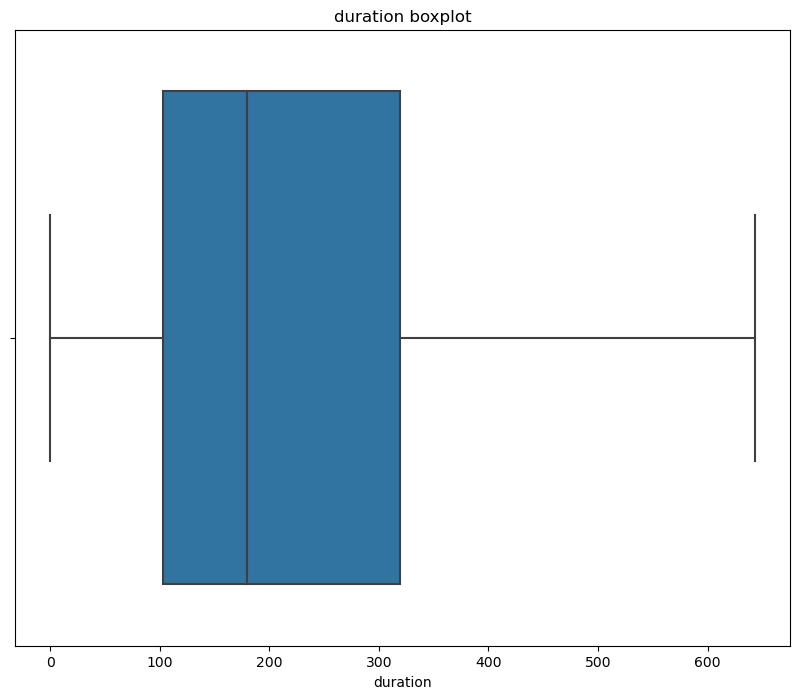

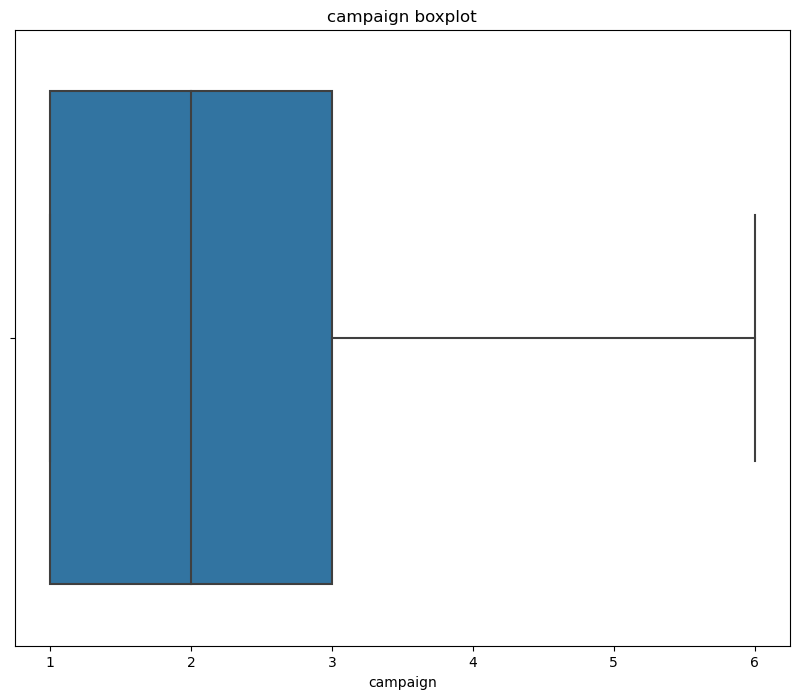

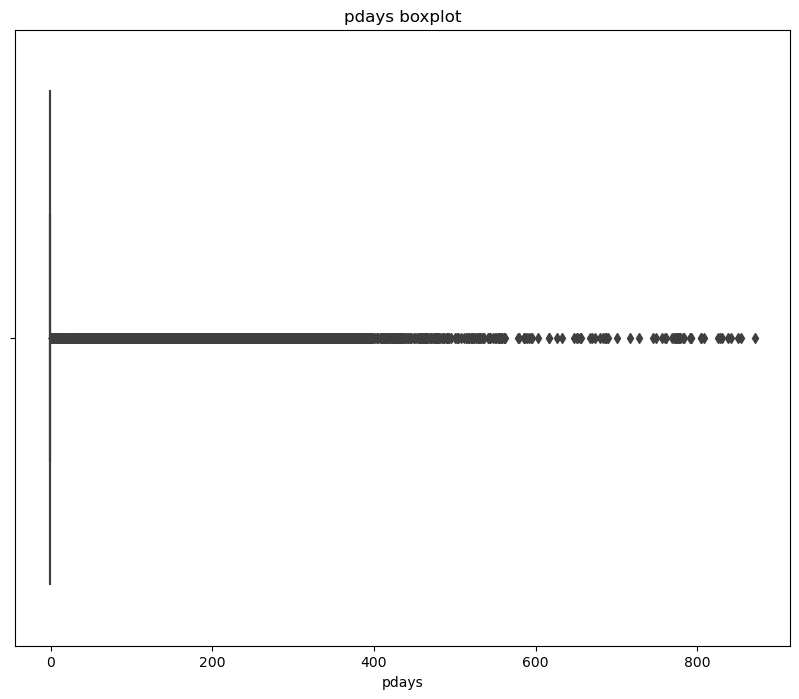

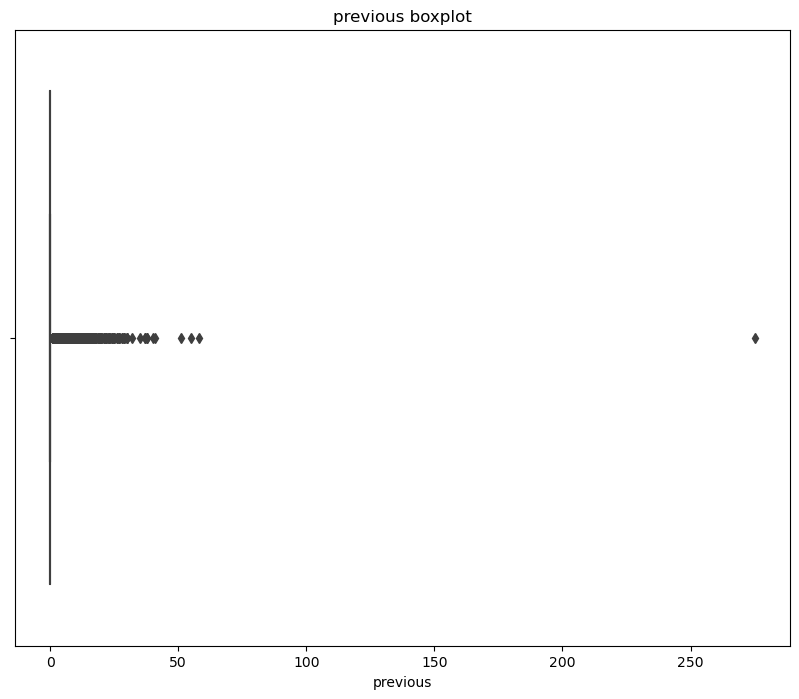

In [22]:
for col in num_col:
    plt.figure(figsize=(10,8))
    sns.boxplot(x = df[col])
    plt.title(f"{col} boxplot")
plt.show()

## Label Encoding and One Hot encoding

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58.0,management,married,tertiary,no,2143.0,yes,no,5.0,may,261.0,1.0,-1,0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5.0,may,151.0,1.0,-1,0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5.0,may,76.0,1.0,-1,0,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,5.0,may,92.0,1.0,-1,0,no
4,33.0,blue-collar,single,secondary,no,1.0,no,no,5.0,may,198.0,1.0,-1,0,no


In [24]:
#target variable encoding
df['Target'] = df['Target'].map({'yes' : 1,
                 'no' : 0})

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58.0,management,married,tertiary,no,2143.0,yes,no,5.0,may,261.0,1.0,-1,0,0
1,44.0,technician,single,secondary,no,29.0,yes,no,5.0,may,151.0,1.0,-1,0,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5.0,may,76.0,1.0,-1,0,0
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,5.0,may,92.0,1.0,-1,0,0
4,33.0,blue-collar,single,secondary,no,1.0,no,no,5.0,may,198.0,1.0,-1,0,0


In [26]:
#getting X and Y
try:
    cat_col.remove('Target')
except Exception as e:
    print('Target - Removed')
X = df.drop('Target', axis =1)
Y = df['Target']
X_cat = pd.get_dummies(X, columns= cat_col, drop_first= 1)
scale = StandardScaler()
scaled_arr = scale.fit_transform(X[num_col])
temp_df = pd.DataFrame(scaled_arr, columns=num_col)

In [27]:
temp_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.648117,1.027653,-1.298476,0.147445,-0.870092,-0.411453,-0.25194
1,0.301287,-0.768817,-1.298476,-0.474910,-0.870092,-0.411453,-0.25194
2,-0.756936,-0.791761,-1.298476,-0.899243,-0.870092,-0.411453,-0.25194
3,0.589894,0.486333,-1.298476,-0.808718,-0.870092,-0.411453,-0.25194
4,-0.756936,-0.792611,-1.298476,-0.208994,-0.870092,-0.411453,-0.25194


In [28]:
#replacing X_cat columns with temp_df
for col in num_col:
    X_cat[col] = temp_df[col]

In [29]:
X_cat.head()
X = X_cat.copy()

<Axes: >

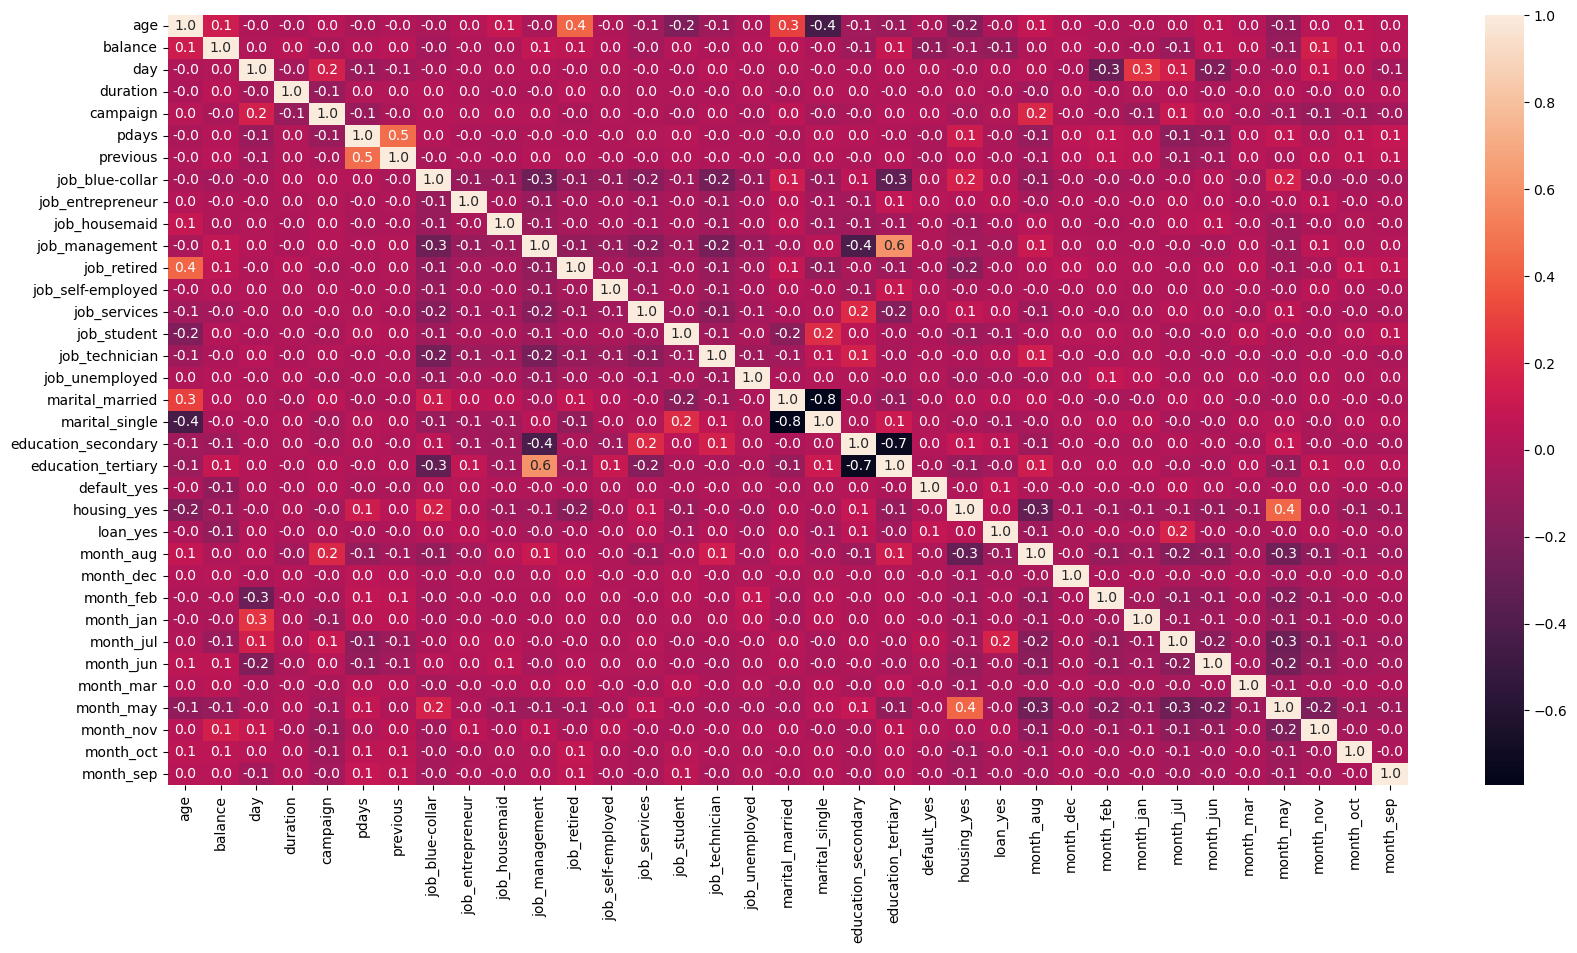

In [30]:
# checking coreleation matrix
plt.figure(figsize=(20,10))
cor_mat = X.corr()
sns.heatmap(cor_mat, annot= True, fmt = '.1f')

- No collinearity noted.

In [31]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size= .8, random_state= 42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 35)
(9043, 35)
(36168,)
(9043,)


# Model building

In [33]:
lr = LogisticRegression()
nb_clf = GaussianNB()
# svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

models = [lr, nb_clf, knn_clf, dt_clf, rf_clf]
model_name = ['Logistic Regression', 'Gussian NB', 'KNN', 'Decision Tree', 'Random Forest']

In [34]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def model_predict(X1, X2, y1,y2, models):
    scores = []
    train_model = []
    for model in models:
        model.fit(X1,y1)
        y_pred = model.predict(X2)
        score = accuracy_score(y2, y_pred)
        scores.append(score)
        train_model.append(model)
    return scores, train_model

In [35]:
acc_score, train_model = model_predict(X_train, X_test, y_train, y_test, models)

<Axes: >

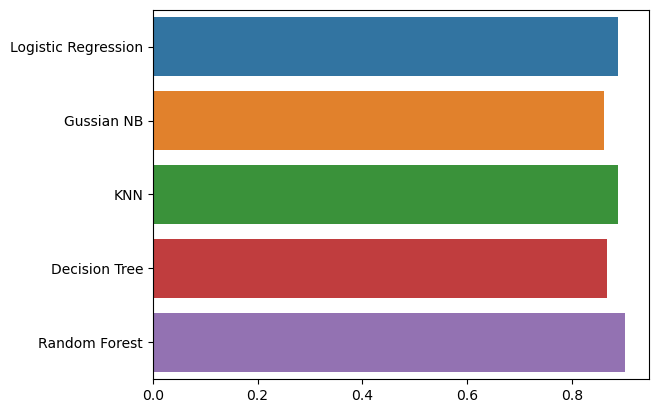

In [36]:
sns.barplot(x=acc_score, y=model_name)

In [37]:
#checking classification report and f1score

for model in train_model:
    y_pred = model.predict(X_test)
    print(str(model))
    print("=="*30)
    print(classification_report(y_test, y_pred))
    print(f"f1_score: {f1_score(y_test, y_pred)}")
    print("=="*30)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.28      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043

f1_score: 0.378146101903008
GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7952
           1       0.42      0.35      0.38      1091

    accuracy                           0.86      9043
   macro avg       0.66      0.64      0.65      9043
weighted avg       0.85      0.86      0.86      9043

f1_score: 0.3778110944527736
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.31      0.41      1091

    accuracy                           0.89      9043
   macro avg  

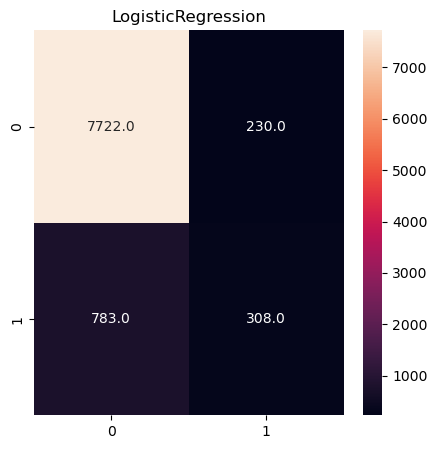

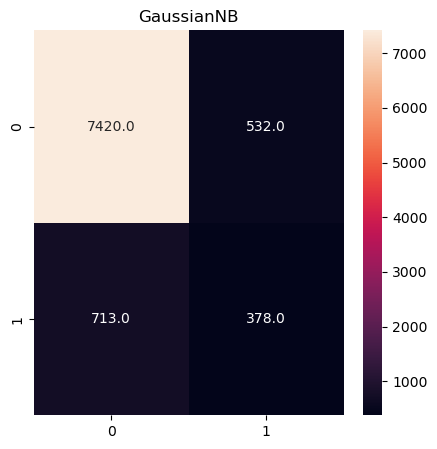

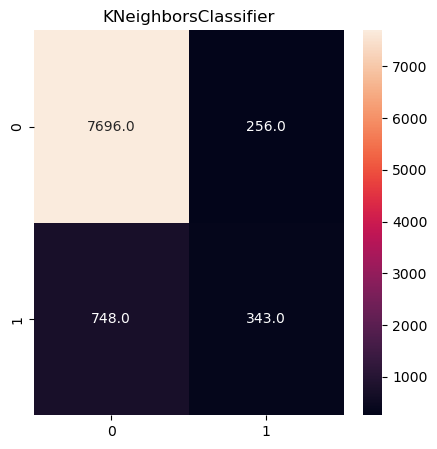

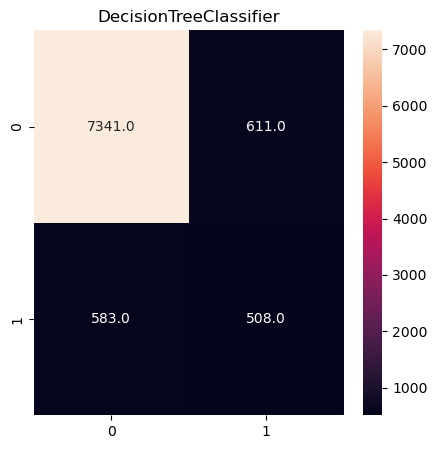

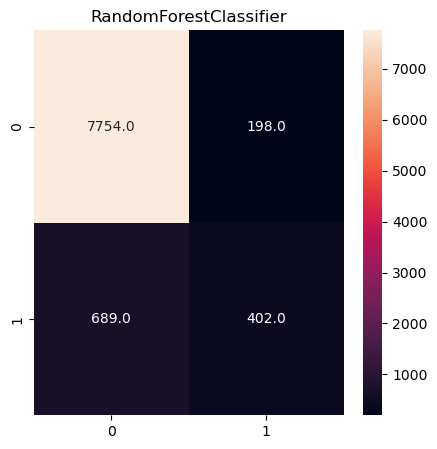

In [38]:
#confusion matrix
for model in train_model:
    plt.figure(figsize=(5,5))
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.1f' )
    plt.title(f"{type(model).__name__}")

## Hyperparameter tunning

In [39]:
from sklearn.model_selection import RandomizedSearchCV


# rf_clf1.get_params()

In [40]:
param_grid = {
#     'bootstrap' : [True, False],
    'criterion' : ["gini", "entropy"],
    'max_depth' : list(range(5,20)),
    'oob_score' : [True, False],
    'max_features' : list(range(20,200,10)),
    'n_estimators' : list(range(350, 550, 25)),
    "min_samples_split": range(2, 403, 20)
}

# scoring = {"AUC": "roc_auc"}
# random_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions= param_grid, refit= 'AUC', scoring= scoring, n_iter= 50, n_jobs=-1, cv= 5)

# random_cv.fit(X_train, y_train)

In [41]:
# results = random_cv.cv_results_

In [42]:
# random_cv.best_estimator_ #criterion='entropy', max_depth=19, max_features=150,
#                        min_samples_split=22, n_estimators=475, random_state=42

In [43]:
rf_clf1 = RandomForestClassifier(random_state= 42,criterion='entropy', max_depth=15, max_features= 150,
                                 min_samples_split=22, n_estimators=475, class_weight='balanced', min_weight_fraction_leaf= 0.0002,
                                ccp_alpha= 0.0005)

In [44]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0005, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=150,
                       min_samples_split=22, min_weight_fraction_leaf=0.0002,
                       n_estimators=475, random_state=42)

In [45]:
y_pred_hyp = rf_clf1.predict(X_test)
y_pred = rf_clf.predict(X_test)

In [46]:
print("Random Forest")
print("=="*30)
print(classification_report(y_test, y_pred))
print(f"f1 Score: {f1_score(y_test, y_pred)}")
print("=="*30)
print("Hypertune Random Forest")
print("=="*30)
print(classification_report(y_test, y_pred_hyp))
print(f"f1 Score: {f1_score(y_test, y_pred_hyp)}")
print("=="*30)

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.67      0.37      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

f1 Score: 0.47545830869308103
Hypertune Random Forest
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7952
           1       0.43      0.84      0.57      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043

f1 Score: 0.5725856697819315


Text(0.5, 1.0, 'Random forest hypertuned')

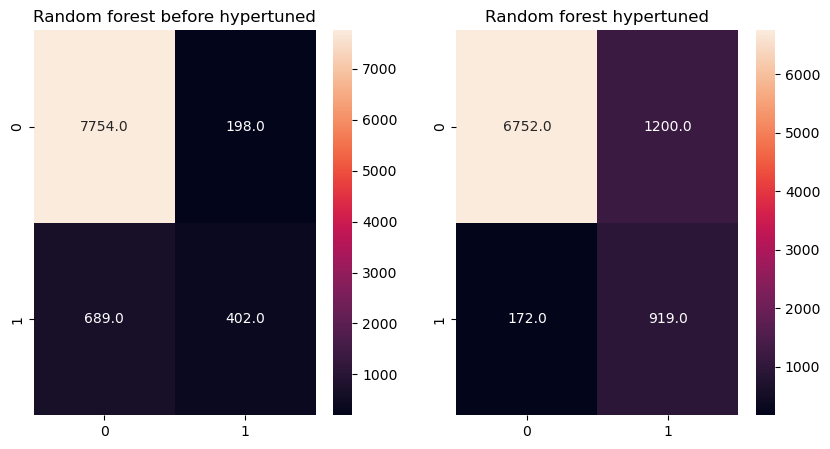

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.1f')
plt.title("Random forest before hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_hyp), annot= True, fmt = '.1f')
plt.title("Random forest hypertuned")

## Using Ada Boost with Hypertune RandomForest

In [59]:
#uding a trained model inside the Adaboost
rf = RandomForestClassifier(ccp_alpha=0.0005, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=150,
                       min_samples_split=22, min_weight_fraction_leaf=0.0002,
                       n_estimators=475, random_state=4)
ada_clf = AdaBoostClassifier(estimator= rf,n_estimators=100)

In [60]:
ada_clf.fit(X_test, y_test)

AdaBoostClassifier(estimator=RandomForestClassifier(ccp_alpha=0.0005,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=15,
                                                    max_features=150,
                                                    min_samples_split=22,
                                                    min_weight_fraction_leaf=0.0002,
                                                    n_estimators=475,
                                                    random_state=4),
                   n_estimators=100)

In [61]:
y_pred_ada = ada_clf.predict(X_test)

In [62]:
print("Hypertune Random Forest")
print("=="*30)
print(classification_report(y_test, y_pred_hyp))
print(f"f1 Score: {f1_score(y_test, y_pred_hyp)}")
print("=="*30)
print("Ada Boost with hypertune RF")
print("=="*30)
print(classification_report(y_test, y_pred_ada))
print(f"f1 Score: {f1_score(y_test, y_pred_ada)}")
print("=="*30)

Hypertune Random Forest
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7952
           1       0.43      0.84      0.57      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043

f1 Score: 0.5725856697819315
Ada Boost with hypertune RF
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7952
           1       0.91      1.00      0.95      1091

    accuracy                           0.99      9043
   macro avg       0.96      0.99      0.97      9043
weighted avg       0.99      0.99      0.99      9043

f1 Score: 0.9532546963739624


Text(0.5, 1.0, 'AdaBoost with random forest hypertuned')

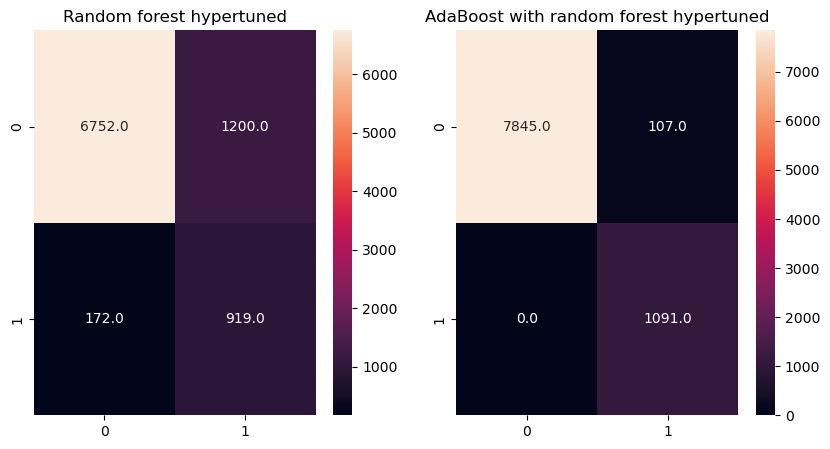

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_hyp), annot= True, fmt = '.1f')
plt.title("Random forest hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot= True, fmt = '.1f')
plt.title("AdaBoost with random forest hypertuned")

In [57]:
gd_clf = GradientBoostingClassifier(random_state= 42)
gd_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [58]:
y_pred_gd = gd_clf.predict(X_test)
print(classification_report(y_test,y_pred_gd)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.36      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



Text(0.5, 1.0, 'Gradient Boosting')

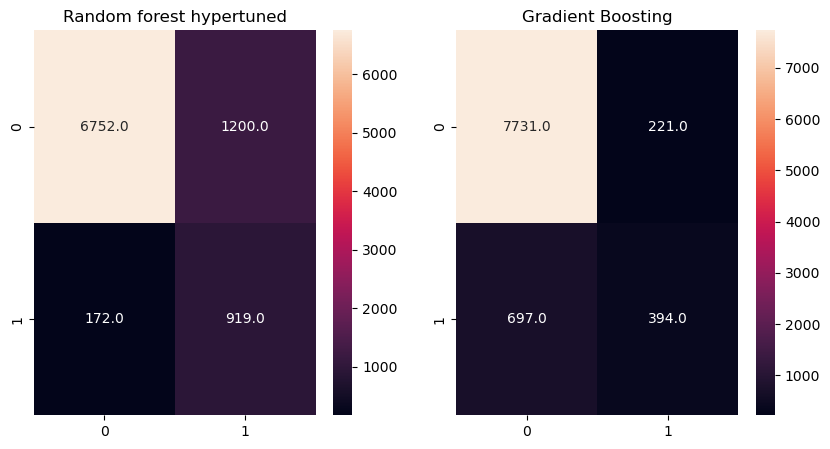

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_hyp), annot= True, fmt = '.1f')
plt.title("Random forest hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gd), annot= True, fmt = '.1f')
plt.title("Gradient Boosting")

In [83]:
xg = XGBClassifier(n_estimators = 400)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred_xg = xg.predict(X_test)
print(classification_report(y_test,y_pred_xg)) 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.62      0.48      0.54      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043



## Using SMOTE to create new dataset

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [65]:
from collections import Counter
print(f'post smote: {Counter(y_train_resampled)}')
print(f'before smote: {Counter(y_train)}')

post smote: Counter({0: 31970, 1: 25576})
before smote: Counter({0: 31970, 1: 4198})


## Hypertune with RandomForest

In [67]:
rf_cl2 = RandomForestClassifier(random_state= 42, oob_score= True)
param_grid1 = {

    'max_depth' : list(range(5,14)),
    'max_features' : list(range(5,40,10)),
    'n_estimators' : list(range(350, 550, 25)),
    'min_impurity_decrease' : np.logspace(0,-25,50)
}

scoring = {"AUC": "roc_auc"}
random_cv1 = RandomizedSearchCV(estimator=rf_cl2, param_distributions= param_grid1, refit= 'AUC', 
                                scoring= scoring, n_iter= 50, n_jobs=-1, cv= 5)

random_cv1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13],
                                        'max_features': [5, 15, 25, 35],
                                        'min_impurity_decrease': array([1.00000000e+00, 3.08884360e-01, 9.54095476e-02, 2.94705170e-02,
       9.10298178e-03, 2.81176870e-03, 8.68511374e-04, 2.68269580e-04,
       8.286...
       4.71486636e-17, 1.45634848e-17, 4.49843267e-18, 1.38949549e-18,
       4.29193426e-19, 1.32571137e-19, 4.09491506e-20, 1.26485522e-20,
       3.90693994e-21, 1.20679264e-21, 3.72759372e-22, 1.15139540e-22,
       3.55648031e-23, 1.09854114e-23, 3.39322177e-24, 1.04811313e-24,
       3.23745754e-25, 1.00000000e-25]),
                                        'n_estimators': [350, 375, 400, 425,
                                                         450, 475, 500, 525]},
                   refit='AUC', scoring={'AUC': 'roc_auc'})

In [68]:
random_cv1.best_estimator_

RandomForestClassifier(max_depth=13, max_features=15,
                       min_impurity_decrease=5.179474679231202e-15,
                       n_estimators=375, oob_score=True, random_state=42)

In [69]:
rf_clf3 = RandomForestClassifier(max_depth=13, max_features=15,
                       min_impurity_decrease=5.179474679231202e-15,
                       n_estimators=375, oob_score=True, random_state=42)
rf_clf3.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=13, max_features=15,
                       min_impurity_decrease=5.179474679231202e-15,
                       n_estimators=375, oob_score=True, random_state=42)

In [70]:
y_pred1 = rf_clf3.predict(X_test)

In [71]:
print("Hypertune Random Forest")
print("=="*30)
print(classification_report(y_test, y_pred_hyp))
print(f"f1 Score: {f1_score(y_test, y_pred_hyp)}")
print("=="*30)
print("Hypertune Random Forest with SMOTE")
print("=="*30)
print(classification_report(y_test, y_pred1))
print(f"f1 Score: {f1_score(y_test, y_pred1)}")
print("=="*30)

Hypertune Random Forest
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7952
           1       0.43      0.84      0.57      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043

f1 Score: 0.5725856697819315
Hypertune Random Forest with SMOTE
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7952
           1       0.48      0.75      0.59      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.82      0.76      9043
weighted avg       0.90      0.87      0.88      9043

f1 Score: 0.5869643500180051


Text(0.5, 1.0, 'Random forest hypertuned with SMOTE')

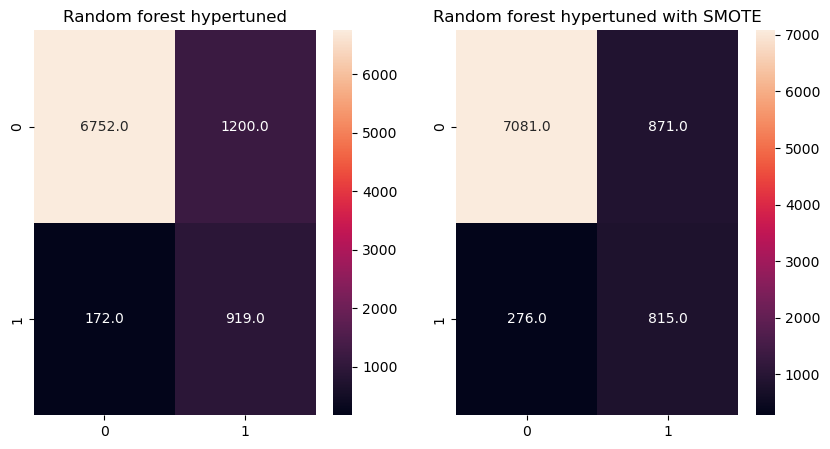

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_hyp), annot= True, fmt = '.1f')
plt.title("Random forest hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred1), annot= True, fmt = '.1f')
plt.title("Random forest hypertuned with SMOTE")

## AdaBoost with Hypertune RandomForest

In [73]:
rf_clf4 = RandomForestClassifier(max_depth=13, max_features=15,
                       min_impurity_decrease=5.179474679231202e-15,
                       n_estimators=375, oob_score=True, random_state=42)

In [74]:
ada_clf4 = AdaBoostClassifier(estimator= rf_clf4,n_estimators= 50, random_state= 42)
ada_clf4.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=13,
                                                    max_features=15,
                                                    min_impurity_decrease=5.179474679231202e-15,
                                                    n_estimators=375,
                                                    oob_score=True,
                                                    random_state=42),
                   random_state=42)

In [75]:
y_pred4 = rf_clf3.predict(X_test)

In [76]:
print("AdaBoost with RandomForest Before SMOTE")
print("=="*30)
print(classification_report(y_test, y_pred_ada))
print(f"f1 Score: {f1_score(y_test, y_pred_ada)}")
print("=="*30)
print("Adaboost with Random Forest with SMOTE")
print("=="*30)
print(classification_report(y_test, y_pred4))
print(f"f1 Score: {f1_score(y_test, y_pred4)}")
print("=="*30)

AdaBoost with RandomForest Before SMOTE
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7952
           1       0.91      1.00      0.95      1091

    accuracy                           0.99      9043
   macro avg       0.96      0.99      0.97      9043
weighted avg       0.99      0.99      0.99      9043

f1 Score: 0.9532546963739624
Adaboost with Random Forest with SMOTE
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7952
           1       0.48      0.75      0.59      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.82      0.76      9043
weighted avg       0.90      0.87      0.88      9043

f1 Score: 0.5869643500180051


Text(0.5, 1.0, 'Adaboost with Random Forest with SMOTE')

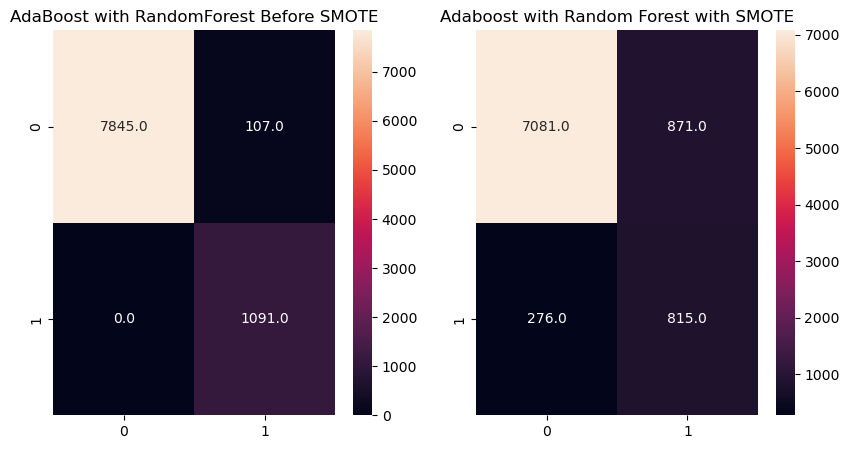

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot= True, fmt = '.1f')
plt.title("AdaBoost with RandomForest Before SMOTE")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred4), annot= True, fmt = '.1f')
plt.title("Adaboost with Random Forest with SMOTE")

## Using XGBoost

In [80]:
xg1 = XGBClassifier(n_estimators = 400)
xg1.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
y_pred_xg1 = xg1.predict(X_test)

In [85]:
print("XGBoost before SMOTE")
print(classification_report(y_test,y_pred_xg)) 
print(f"f1 Score: {f1_score(y_test, y_pred_xg)}")
print("=="*30)
print("XG boost Hypertune Random Forest with SMOTE")
print("=="*30)
print(classification_report(y_test, y_pred_xg1))
print(f"f1 Score: {f1_score(y_test, y_pred_xg1)}")
print("=="*30)

XGBoost before SMOTE
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.62      0.48      0.54      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043

f1 Score: 0.5424430641821946
XG boost Hypertune Random Forest with SMOTE
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.57      0.51      0.54      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.73      0.74      9043
weighted avg       0.89      0.89      0.89      9043

f1 Score: 0.5370101596516692


Text(0.5, 1.0, 'XG Boost with SMOTE')

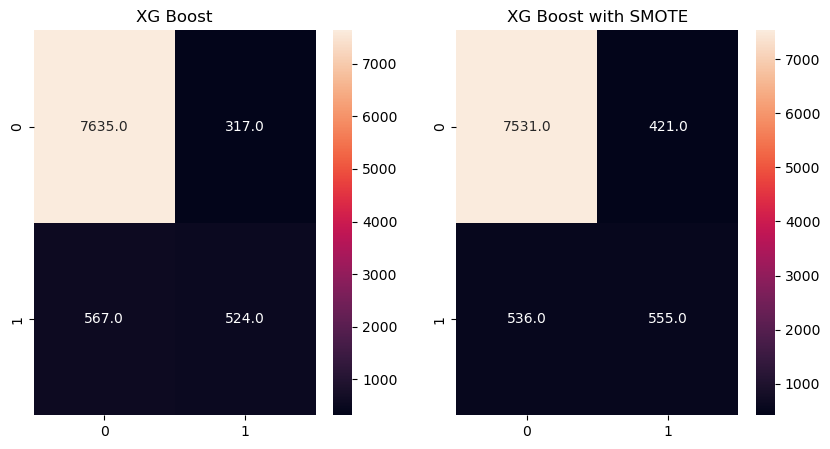

In [86]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot= True, fmt = '.1f')
plt.title("XG Boost")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xg1), annot= True, fmt = '.1f')
plt.title("XG Boost with SMOTE")